In [69]:
#project_name = "."
#project_name = "jfreechart"
project_name = "argouml"

In [70]:
import json
import pandas as pd

class_dependency_file = "input/" + project_name + "/all-ug.cmr"
with open(class_dependency_file, 'r') as file:
    class_dependency_data = json.load(file)

class_id_file = "input/" + project_name + "/idmap.json"
with open(class_id_file, 'r') as file:
    class_id_data = json.load(file)

In [71]:
class_dependency_graph_data = class_dependency_data['graph']
print("Keys in the graph:", class_dependency_graph_data.keys())

Keys in the graph: dict_keys(['vList', 'eList', 'lMap', 'clusterMap'])


In [72]:
# Get key from value
def get_key(val): 
    for key, value in class_id_data['keys'].items(): 
         if val == value: 
             return key 
  
    return "key doesn't exist"

# Get the class name from the class id
def get_class_name(class_id):
    class_name_with_prefix = get_key(class_id)
    class_name = class_name_with_prefix.split('L')[1]
    return class_name

In [73]:
# Generate the graph data
import networkx as nx

G = nx.MultiDiGraph()

def add_nodes_to_graph(graph, nodes):
    for node in nodes:
        class_id = node['type']
        class_name = get_class_name(class_id)
        print("Class name:", class_name)
        graph.add_node(class_name)
        
add_nodes_to_graph(G, class_dependency_graph_data['vList'])

Class name: org.argouml.uml.ui.foundation.core.ActionAddOperation
Class name: org.argouml.uml.cognitive.critics.CrNoTriggerOrGuard
Class name: org.argouml.kernel.Command
Class name: org.argouml.gefext.ArgoModeCreateFigRect
Class name: org.argouml.model.mdr.MetaTypesMDRImpl
Class name: org.argouml.notation.NotationProvider
Class name: org.argouml.cognitive.checklist.ui.TableModelChecklist
Class name: org.argouml.core.propertypanels.ui.UM
Class name: org.argouml.ui.PredicateMType
Class name: org.argouml.uml.diagram.state.ui.FigTransition
Class name: org.argouml.sequence2.diagram.ModePlaceClassifierRole
Class name: org.argouml.profile.internal.ocl.ComputeDesignMaterials
Class name: org.argouml.persistence.ModelMemberFilePersister
Class name: org.argouml.uml.reveng.ui.ImportStatusScreen
Class name: org.argouml.application.events.ArgoDiagramAppearanceEvent
Class name: org.argouml.model.mdr.XmiWriterMDRImpl
Class name: org.argouml.notation2.NotationText
Class name: org.argouml.uml.ui.foundat

In [74]:
def add_edges_to_graph(graph, edgeList):
    for edges in edgeList:
        for edge in edges['L']:
            source_class_id = edge['s']
            source_class_name = get_class_name(source_class_id)
            destination_class_id = edge['d']
            destination_class_name = get_class_name(destination_class_id)
            weight = edge['w']
            print(f"Edge: {source_class_name} -> {destination_class_name}, weight: {weight}")
            graph.add_edge(source_class_name, destination_class_name, weight=weight)

add_edges_to_graph(G, class_dependency_graph_data['eList'])

Edge: org.argouml.notation.providers.uml.Enumeration -> org.argouml.kernel.Project, weight: 2
Edge: org.argouml.notation.providers.uml.Enumeration -> org.argouml.kernel.Project, weight: 3
Edge: org.argouml.uml.cognitive.critics.CrNoInstanceVariables -> org.argouml.cognitive.critics.Wizard, weight: 1
Edge: org.argouml.uml.diagram.ui.FigStereotypesGroup -> org.argouml.kernel.Project, weight: 1
Edge: org.argouml.uml.diagram.ui.FigStereotypesGroup -> org.argouml.kernel.Project, weight: 3
Edge: org.argouml.profile.ZipModel -> org.argouml.profile.StreamModel, weight: 1
Edge: org.argouml.profile.ZipModel -> org.argouml.profile.StreamModel, weight: 1
Edge: org.argouml.uml.diagram.deployment.ui.UM -> org.argouml.uml.diagram.DiagramElement, weight: 1
Edge: org.argouml.uml.diagram.ui.ActionNavigateUpFromDiagram -> org.argouml.uml.diagram.ArgoDiagram, weight: 1
Edge: org.argouml.ui.StatusBar -> org.argouml.taskmgmt.ProgressMonitor, weight: 1
Edge: org.argouml.notation.providers.ObjectFlowStateType

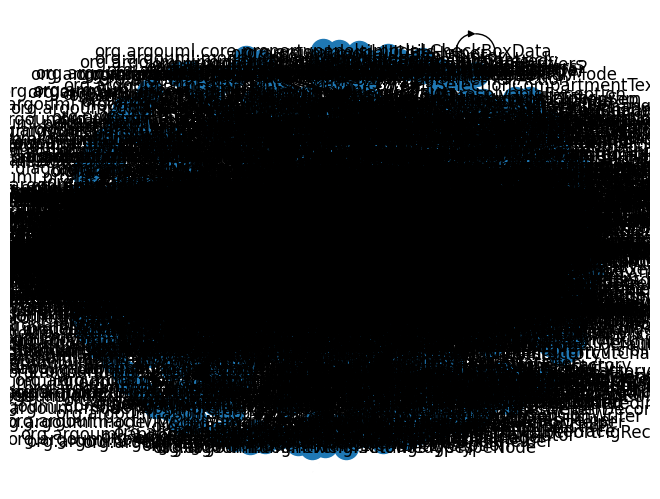

In [75]:
# Print the graph
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)
plt.show()

In [76]:
import pandas as pd

def load_data(file_path):
    data = pd.read_csv(file_path, sep='\t')
    return data

def remove_empty_rows(data):
    data = data.dropna(subset=['Name'])
    return data

def remove_unnamed_columns(data):
    data = data.filter(regex='^(?!Unnamed.*)')
    return data

def remove_nan_columns(data):
    data = data.dropna(axis=1, how='all')
    return data

def remove_package_rows(data):
    data = data[~data['QualifiedName'].str.contains("<Package>")]
    return data

def convert_ordinal_to_numerical(data):
    ordinal_mapping = {
        'low': 1,
        'low-medium': 2,
        'medium-high': 3,
        'high': 4,
        'very-high': 5
    }
    columns_to_convert = ['Complexity', 'Coupling', 'Size', 'Lack of Cohesion']
    for column in columns_to_convert:
        data[column] = data[column].replace(ordinal_mapping)
    return data

dataset_file = "input/" + project_name + "/class-metrics-dataset.csv"
dataset = load_data(dataset_file)
dataset = remove_empty_rows(dataset)
dataset = remove_unnamed_columns(dataset)
dataset = remove_nan_columns(dataset)
dataset = remove_package_rows(dataset)
dataset = convert_ordinal_to_numerical(dataset)

print(dataset.head())

                                       QualifiedName   
2        org.argouml.activity2.ActivityDiagramModule  \
3  org.argouml.activity2.ActivityDiagramPropPanel...   
5  org.argouml.activity2.diagram.ActivityDiagramF...   
6  org.argouml.activity2.diagram.ActivityDiagramG...   
7  org.argouml.activity2.diagram.ActivityDiagramR...   

                              Name  Complexity  Coupling  Size   
2            ActivityDiagramModule           1         2     1  \
3  ActivityDiagramPropPanelFactory           1         1     1   
5           ActivityDiagramFactory           1         1     1   
6        ActivityDiagramGraphModel           2         1     1   
7          ActivityDiagramRenderer           3         3     1   

   Lack of Cohesion   CBO    RFC  SRFC  DIT  ...  NOF  NOSF  NOM  NOSM  NORM   
2                 1   7.0   15.0   7.0  1.0  ...  1.0   0.0  4.0   0.0   0.0  \
3                 1   1.0    1.0   0.0  1.0  ...  0.0   0.0  1.0   0.0   0.0   
5                 1   3.0 

In [77]:
def label_problematic_class(row, problematic_class_threshold=2, highly_problematic_class_threshold=3):
    problematic_score = (row['Complexity'] + row['Coupling'] + row['Size'] + row['Lack of Cohesion']) / 4
    if problematic_score > highly_problematic_class_threshold:
        return 2
    elif problematic_score > problematic_class_threshold:
        return 1
    else:
        return 0

# Label the dataset
dataset['Problematic'] = dataset.apply(label_problematic_class, axis=1)

# Count the number of Problematic Classes
num_dataset_rows = dataset.shape[0]
num_problematic_classes = dataset[dataset['Problematic'] == 1].shape[0]
num_highly_problematic_classes = dataset[dataset['Problematic'] == 2].shape[0]
print(f'Number of instances in the dataset: {num_dataset_rows}')
print(f'Number of Problematic Classes in the dataset: {num_problematic_classes}')
print(f'Number of Highly Problematic Classes in the dataset: {num_highly_problematic_classes}')

Number of instances in the dataset: 1734
Number of Problematic Classes in the dataset: 227
Number of Highly Problematic Classes in the dataset: 93


In [78]:
def remove_labeling_columns(data):
    data = data.drop(['Name', 'Complexity', 'Coupling', 'Size', 'Lack of Cohesion'], axis=1)
    return data

dataset = remove_labeling_columns(dataset)
print(dataset.head())

                                       QualifiedName   CBO    RFC  SRFC  DIT   
2        org.argouml.activity2.ActivityDiagramModule   7.0   15.0   7.0  1.0  \
3  org.argouml.activity2.ActivityDiagramPropPanel...   1.0    1.0   0.0  1.0   
5  org.argouml.activity2.diagram.ActivityDiagramF...   3.0    4.0   3.0  1.0   
6  org.argouml.activity2.diagram.ActivityDiagramG...   0.0    5.0   0.0  3.0   
7  org.argouml.activity2.diagram.ActivityDiagramR...  13.0  149.0  10.0  2.0   

   NOC  WMC   LOC  CMLOC  NOF  NOSF  NOM  NOSM  NORM  LCOM   LCAM   LTCC   
2  0.0  9.0  30.0   28.0  1.0   0.0  4.0   0.0   0.0   0.0  0.375  0.833  \
3  0.0  2.0   9.0    4.0  0.0   0.0  1.0   0.0   0.0   0.0  0.000  0.000   
5  0.0  3.0  14.0   10.0  0.0   1.0  1.0   0.0   0.0   0.0  0.000  0.000   
6  0.0  5.0  14.0   11.0  0.0   1.0  5.0   0.0   0.0   0.0  0.100  1.000   
7  0.0  6.0  31.0   28.0  0.0   1.0  2.0   0.0   0.0   0.0  0.000  1.000   

   ATFD   SI  Problematic  
2   0.0  0.0            0  
3   0.

In [79]:
# Embedding software metrics in dataset to nodes in the graph
def get_node_embedding(node, data):
    node_embedding = data[data['QualifiedName'].apply(lambda x: node in x)]
    return node_embedding

def get_node_embedding_list(graph, data):
    node_embedding_list = []
    for node, node_data in graph.nodes(data=True):
        node_embedding = get_node_embedding(node, data)
        node_data['CBO'] = node_embedding['CBO'].iloc[0]
        node_data['RFC'] = node_embedding['RFC'].iloc[0]
        node_data['SRFC'] = node_embedding['SRFC'].iloc[0]
        node_data['DIT'] = node_embedding['DIT'].iloc[0]
        node_data['NOC'] = node_embedding['NOC'].iloc[0]
        node_data['WMC'] = node_embedding['WMC'].iloc[0]
        node_data['LOC'] = node_embedding['LOC'].iloc[0]
        node_data['CMLOC'] = node_embedding['CMLOC'].iloc[0]
        node_data['NOF'] = node_embedding['NOF'].iloc[0]
        node_data['NOSF'] = node_embedding['NOSF'].iloc[0]
        node_data['NOM'] = node_embedding['NOM'].iloc[0]
        node_data['NOSM'] = node_embedding['NOSM'].iloc[0]
        node_data['NORM'] = node_embedding['NORM'].iloc[0]
        node_data['LCOM'] = node_embedding['LCOM'].iloc[0]
        node_data['LCAM'] = node_embedding['LCAM'].iloc[0]
        node_data['LTCC'] = node_embedding['LTCC'].iloc[0]
        node_data['ATFD'] = node_embedding['ATFD'].iloc[0]
        node_data['SI'] = node_embedding['SI'].iloc[0]
        node_data['Problematic'] = node_embedding['Problematic'].iloc[0]
        node_embedding_list.append(node_data)
    return node_embedding_list

node_embedding_list = get_node_embedding_list(G, dataset)
print(node_embedding_list)

[{'CBO': 10.0, 'RFC': 117.0, 'SRFC': 22.0, 'DIT': 3.0, 'NOC': 0.0, 'WMC': 8.0, 'LOC': 44.0, 'CMLOC': 40.0, 'NOF': 0.0, 'NOSF': 2.0, 'NOM': 3.0, 'NOSM': 1.0, 'NORM': 0.0, 'LCOM': 0.0, 'LCAM': 0.375, 'LTCC': 1.0, 'ATFD': 2.0, 'SI': 0.0, 'Problematic': 0}, {'CBO': 7.0, 'RFC': 48.0, 'SRFC': 25.0, 'DIT': 4.0, 'NOC': 0.0, 'WMC': 10.0, 'LOC': 50.0, 'CMLOC': 48.0, 'NOF': 0.0, 'NOSF': 1.0, 'NOM': 3.0, 'NOSM': 0.0, 'NORM': 2.0, 'LCOM': 0.0, 'LCAM': 0.444, 'LTCC': 0.0, 'ATFD': 1.0, 'SI': 2.667, 'Problematic': 0}, {'CBO': 0.0, 'RFC': 4.0, 'SRFC': 0.0, 'DIT': 1.0, 'NOC': 2.0, 'WMC': 4.0, 'LOC': 5.0, 'CMLOC': 4.0, 'NOF': 0.0, 'NOSF': 0.0, 'NOM': 4.0, 'NOSM': 0.0, 'NORM': 0.0, 'LCOM': 0.0, 'LCAM': 0.0, 'LTCC': 0.0, 'ATFD': 0.0, 'SI': 0.0, 'Problematic': 0}, {'CBO': 3.0, 'RFC': 30.0, 'SRFC': 1.0, 'DIT': 5.0, 'NOC': 0.0, 'WMC': 2.0, 'LOC': 7.0, 'CMLOC': 6.0, 'NOF': 0.0, 'NOSF': 0.0, 'NOM': 2.0, 'NOSM': 0.0, 'NORM': 2.0, 'LCOM': 0.0, 'LCAM': 0.333, 'LTCC': 0.0, 'ATFD': 0.0, 'SI': 5.0, 'Problematic': 0},

In [80]:
# Print nodes with their embedding
for node, embedding in G.nodes(data=True):
    print(f"Node: {node}, embedding: {embedding}")

Node: org.argouml.uml.ui.foundation.core.ActionAddOperation, embedding: {'CBO': 10.0, 'RFC': 117.0, 'SRFC': 22.0, 'DIT': 3.0, 'NOC': 0.0, 'WMC': 8.0, 'LOC': 44.0, 'CMLOC': 40.0, 'NOF': 0.0, 'NOSF': 2.0, 'NOM': 3.0, 'NOSM': 1.0, 'NORM': 0.0, 'LCOM': 0.0, 'LCAM': 0.375, 'LTCC': 1.0, 'ATFD': 2.0, 'SI': 0.0, 'Problematic': 0}
Node: org.argouml.uml.cognitive.critics.CrNoTriggerOrGuard, embedding: {'CBO': 7.0, 'RFC': 48.0, 'SRFC': 25.0, 'DIT': 4.0, 'NOC': 0.0, 'WMC': 10.0, 'LOC': 50.0, 'CMLOC': 48.0, 'NOF': 0.0, 'NOSF': 1.0, 'NOM': 3.0, 'NOSM': 0.0, 'NORM': 2.0, 'LCOM': 0.0, 'LCAM': 0.444, 'LTCC': 0.0, 'ATFD': 1.0, 'SI': 2.667, 'Problematic': 0}
Node: org.argouml.kernel.Command, embedding: {'CBO': 0.0, 'RFC': 4.0, 'SRFC': 0.0, 'DIT': 1.0, 'NOC': 2.0, 'WMC': 4.0, 'LOC': 5.0, 'CMLOC': 4.0, 'NOF': 0.0, 'NOSF': 0.0, 'NOM': 4.0, 'NOSM': 0.0, 'NORM': 0.0, 'LCOM': 0.0, 'LCAM': 0.0, 'LTCC': 0.0, 'ATFD': 0.0, 'SI': 0.0, 'Problematic': 0}
Node: org.argouml.gefext.ArgoModeCreateFigRect, embedding: {'CB

In [81]:
# Save the graph data to a file
import pickle

output_graph_data_file = "output/" + project_name + "/graph_data_for_problematic_classes.pickle"
with open(output_graph_data_file, 'wb') as file:
    pickle.dump(G, file)

In [82]:
# Load the graph data from a file
import pickle

with open(output_graph_data_file, 'rb') as file:
    G = pickle.load(file)

# Print nodes with their embedding
for node, embedding in G.nodes(data=True):
    print(f"Node: {node}, embedding: {embedding}")

Node: org.argouml.uml.ui.foundation.core.ActionAddOperation, embedding: {'CBO': 10.0, 'RFC': 117.0, 'SRFC': 22.0, 'DIT': 3.0, 'NOC': 0.0, 'WMC': 8.0, 'LOC': 44.0, 'CMLOC': 40.0, 'NOF': 0.0, 'NOSF': 2.0, 'NOM': 3.0, 'NOSM': 1.0, 'NORM': 0.0, 'LCOM': 0.0, 'LCAM': 0.375, 'LTCC': 1.0, 'ATFD': 2.0, 'SI': 0.0, 'Problematic': 0}
Node: org.argouml.uml.cognitive.critics.CrNoTriggerOrGuard, embedding: {'CBO': 7.0, 'RFC': 48.0, 'SRFC': 25.0, 'DIT': 4.0, 'NOC': 0.0, 'WMC': 10.0, 'LOC': 50.0, 'CMLOC': 48.0, 'NOF': 0.0, 'NOSF': 1.0, 'NOM': 3.0, 'NOSM': 0.0, 'NORM': 2.0, 'LCOM': 0.0, 'LCAM': 0.444, 'LTCC': 0.0, 'ATFD': 1.0, 'SI': 2.667, 'Problematic': 0}
Node: org.argouml.kernel.Command, embedding: {'CBO': 0.0, 'RFC': 4.0, 'SRFC': 0.0, 'DIT': 1.0, 'NOC': 2.0, 'WMC': 4.0, 'LOC': 5.0, 'CMLOC': 4.0, 'NOF': 0.0, 'NOSF': 0.0, 'NOM': 4.0, 'NOSM': 0.0, 'NORM': 0.0, 'LCOM': 0.0, 'LCAM': 0.0, 'LTCC': 0.0, 'ATFD': 0.0, 'SI': 0.0, 'Problematic': 0}
Node: org.argouml.gefext.ArgoModeCreateFigRect, embedding: {'CB

Bad pipe message: %s [b'_+`T+-%\xdbD\xda']
Bad pipe message: %s [b'\xd9\x08L\x19\xe2\xe8 \x8e}\xb9\x90\x8a\x8f:\xc3g\\T#\xb8\x8bX\x94\x91\xd9\xc5\x00\xb8q\xb8\x10\x1cE\xf4&\x03\xf0\xb2\xe9\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c']
Bad pipe message: %s [b'\x1cC\xdc\xdc_\xe5\xcb\xe0&\x99\xa8\xa9\xa9\x89&%\x98\xb5 \xc8\x97"t\xab}\xe0\xe4~\x9f\x11\x95\xbc\xbd\xfa\xbe\x1b\xc6\xadL\xfd\xe0\xdc\x18\xa1dz#\x01\xc6J\x04\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r']
Bad pipe message: %s [b"\xe1T0\x95UD\xff\xd4\x1eP\xb5`\x94=\r\x80F\x15\x00\x00\xf4\xc00\xc0,\xc0(\xc0$\xc0\x14\xc0\n\x00\xa5\x00\xa3\x00\xa1\x00\x9f\x00k\x00j\x00i\x00h\x009\x008\x007\x006\x00\x88\x00\x87\x00\x86\x00\x85\xc0\x19\x00\xa7\x00m\x00:\x00\x89\xc02\xc0.\xc0*\xc0&\xc0\x0f\xc0\x05\x00\x9d\x0